In [ ]:
# EDA Assignment 2
#Title : Amazon Sales Data

In [41]:
# importing some libraryies for EDA
import pandas as pd
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
!pip install matplotlib
from matplotlib.font_manager import FontProperties
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import nltk
nltk.download('punkt')
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Load the Dataset
df = pd.read_csv("amazon.csv")

In [ ]:
# Display the first 5 rows of DataSet
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [ ]:
# Get information about DataSet
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [ ]:
# Summary Stataics of numerical Colums
df.describe()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
count,1465,1465,1465,1465,1465,1465,1465,1463,1465,1465,1465,1465,1465,1465,1465,1465
unique,1351,1337,211,550,449,92,28,1143,1293,1194,1194,1194,1194,1212,1412,1465
top,B07JW9H4J1,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,50%,4.1,"9,378",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...","$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...","Worked on iPhone 7 and didn’t work on XR,Good ...","I am not big on camera usage, personally. I wa...",https://m.media-amazon.com/images/I/413sCRKobN...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
freq,3,5,233,53,120,56,244,9,6,10,10,10,10,8,3,1


In [ ]:
'''1. What is the average rating for each product category?'''

# Ans
# Convert 'rating' column to numeric (float)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Group by product category and calculate the average rating
average_ratings = df.groupby('category')['rating'].mean().reset_index()

# Display the average ratings for each product category
average_ratings

,category,rating
0,Car&Motorbike|CarAccessories|InteriorAccessori...,3.800000
1,Computers&Accessories|Accessories&Peripherals|...,4.150000
2,Computers&Accessories|Accessories&Peripherals|...,3.500000
3,Computers&Accessories|Accessories&Peripherals|...,3.600000
4,Computers&Accessories|Accessories&Peripherals|...,4.050000
...,...,...
206,OfficeProducts|OfficePaperProducts|Paper|Stati...,4.250000
207,OfficeProducts|OfficePaperProducts|Paper|Stati...,4.150000
208,OfficeProducts|OfficePaperProducts|Paper|Stati...,4.300000
209,OfficeProducts|OfficePaperProducts|Paper|Stati...,4.133333


In [ ]:
'''2. What are the top rating_count products by category?'''

# Ans
# Convert 'rating_count' column to numeric (integer)
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')

# Drop rows with NaN in 'rating_count' (if any)
df = df.dropna(subset=['rating_count'])

# Group by product category and find the top-rated product by rating count
top_rated_products = df.groupby('category').apply(lambda x: x.nlargest(1, 'rating_count')).reset_index(drop=True)

# Display the top-rated products by rating count in each category
top_rated_products[['category', 'product_name', 'rating_count']]

,category,product_name,rating_count
0,Computers&Accessories|Accessories&Peripherals|...,Lapster USB 3.0 sata Cable for 2.5 inch SSD an...,817.0
1,Computers&Accessories|Accessories&Peripherals|...,Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...,974.0
2,Computers&Accessories|Accessories&Peripherals|...,Amazon Basics Magic Slate 8.5-inch LCD Writing...,401.0
3,Computers&Accessories|Accessories&Peripherals|...,STRIFF Mpad Mouse Mat 230X190X3mm Gaming Mouse...,491.0
4,Computers&Accessories|Accessories&Peripherals|...,HP 330 Wireless Black Keyboard and Mouse Set w...,427.0
...,...,...,...
78,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",Eureka Forbes car Vac 100 Watts Powerful Sucti...,992.0
79,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,Proven® Copper + Mineral RO+UV+UF 10 to 12 Lit...,535.0
80,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,KENT POWP-Sediment Filter 10'' Thread WCAP,490.0
81,OfficeProducts|OfficePaperProducts|Paper|Copy&...,BRUSTRO Copytinta Coloured Craft Paper A4 Size...,388.0


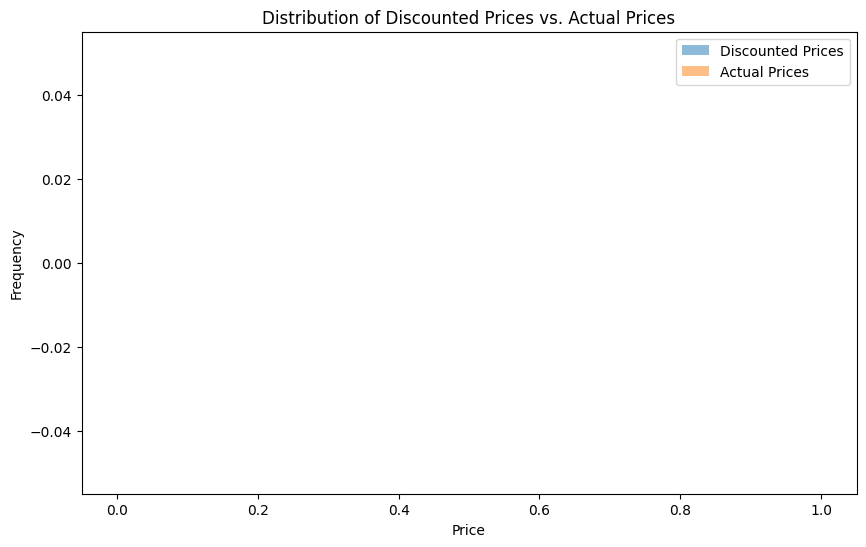

In [ ]:
'''3.What is the distribution of discounted prices vs. actual prices?'''

# Ans
# Drop rows with missing values in 'discounted_price' and 'actual_price'
df = df.dropna(subset=['discounted_price', 'actual_price'])

# Convert 'discounted_price' and 'actual_price' columns to numeric (float)
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')
df['actual_price'] = pd.to_numeric(df['actual_price'], errors='coerce')

# Drop rows with NaN in 'discounted_price' and 'actual_price' columns
df = df.dropna(subset=['discounted_price', 'actual_price'])

# Plotting the distribution of discounted prices vs. actual prices
plt.figure(figsize=(10, 6))
plt.hist(df['discounted_price'], bins=30, alpha=0.5, label='Discounted Prices')
plt.hist(df['actual_price'], bins=30, alpha=0.5, label='Actual Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Discounted Prices vs. Actual Prices')
plt.legend()
plt.show()

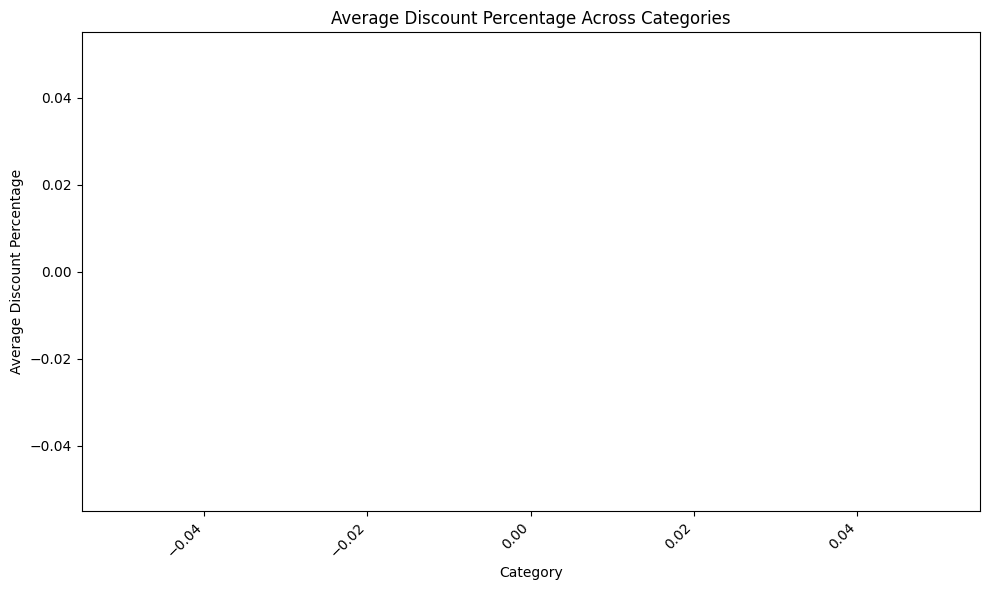

In [ ]:
'''4.How does the average discount percentage vary across categories?'''

# Ans
# Drop rows with missing values in 'discount_percentage' column
df = df.dropna(subset=['discount_percentage'])

# Convert 'discount_percentage' column to numeric (float)
df['discount_percentage'] = pd.to_numeric(df['discount_percentage'], errors='coerce')

# Drop rows with NaN in 'discount_percentage' column
df = df.dropna(subset=['discount_percentage'])

# Group by product category and calculate the average discount percentage
avg_discount_by_category = df.groupby('category')['discount_percentage'].mean().reset_index()

# Plotting the average discount percentage across categories
plt.figure(figsize=(10, 6))
plt.bar(avg_discount_by_category['category'], avg_discount_by_category['discount_percentage'])
plt.xlabel('Category')
plt.ylabel('Average Discount Percentage')
plt.title('Average Discount Percentage Across Categories')
plt.xticks(rotation=45, ha='right')  # Rotate category labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

In [ ]:
'''5.What are the most popular product names?'''

# Ans
# Sort the data by rating_count in descending order
sorted_df = df.sort_values(by='rating_count', ascending=False)

# Select the top 10 most popular product names
top_product_names = sorted_df.head(10)['product_name']

# Display the most popular product names
top_product_names

Series([], Name: product_name, dtype: object)

In [42]:
'''6. What are the most popular product keywords?'''

# Ans
# Combine all product names into a single text
all_product_names = ' '.join(df['product_name'])

# Tokenize the text into individual words
tokens = word_tokenize(all_product_names)

# Filter out stopwords (common words like 'the', 'and', 'is', etc.)
stopwords = set(nltk.corpus.stopwords.words('english'))
filtered_tokens = [word.lower() for word in tokens if word.lower() not in stopwords and word.isalpha()]

# Calculate the frequency of each word
word_freq = Counter(filtered_tokens)

# Get the most common words (keywords)
most_common_words = word_freq.most_common(10)  # Adjust the number as needed

# Display the most popular product keywords
print([word for word, freq in most_common_words])

[]


In [43]:
'''7. What are the most popular product reviews?'''

# Ans
# Sort the reviews by rating in descending order
sorted_reviews = df.sort_values(by='rating', ascending=False)

# Select the top 10 most popular reviews based on ratings
top_reviews = sorted_reviews.head(10)

# Display the most popular product reviews
print(top_reviews[['product_name', 'user_name', 'rating', 'review_title', 'review_content']])

Empty DataFrame
Columns: [product_name, user_name, rating, review_title, review_content]
Index: []


In [44]:
'''8.What is the correlation between discounted_price and rating?'''

# Ans
df = df.dropna(subset=['discounted_price', 'rating'])

# Convert 'discounted_price' column to numeric (float)
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')

# Calculate the correlation between 'discounted_price' and 'rating'
correlation = df['discounted_price'].corr(df['rating'])

# Display the correlation coefficient
print(f"Correlation between discounted price and rating: {correlation}")

Correlation between discounted price and rating: nan


In [45]:
'''9.What are the Top 5 categories based on the highest ratings?'''

# Ans
# Convert 'rating' column to numeric (float)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Calculate the average rating for each category
avg_rating_by_category = df.groupby('category')['rating'].mean().reset_index()

# Sort the categories based on average rating in descending order
sorted_categories = avg_rating_by_category.sort_values(by='rating', ascending=False)

# Select the top 5 categories with the highest average ratings
top_categories = sorted_categories.head(5)

# Display the top 5 categories based on highest ratings
print(top_categories[['category', 'rating']])

Empty DataFrame
Columns: [category, rating]
Index: []


In [ ]:
'''10.Identify any potential areas for improvement or optimization based on the data analysis.'''

# Ans

'''
Data Quality and Completeness:
Ensure that the dataset is clean and free from missing values, outliers, or inaccuracies. This includes handling missing
 data appropriately and performing data validation checks.


Feature Engineering:
Explore additional features that could be derived from the existing data to improve analysis and model performance. For example, creating new features
 based on product descriptions or user reviews could provide valuable insights.


Correlation Analysis:
Conduct a more detailed correlation analysis to understand relationships between different variables in the dataset. This could involve examining
correlations between multiple variables simultaneously and identifying any significant correlations that were not initially explored.


Review Sentiment Analysis:
Perform sentiment analysis on product reviews to extract sentiments (positive, negative, neutral) and analyze how they correlate with other variables
such as ratings, discounted prices, or categories. This can provide deeper insights into customer opinions and satisfaction levels.


Customer Segmentation:
Explore customer segmentation techniques to group customers based on their behavior, preferences, or characteristics. This could help in targeted marketing
 strategies, product recommendations, and improving customer experience.


Predictive Modeling:
Build predictive models to forecast product ratings, pricing trends, or customer behavior. Machine learning techniques such as regression, classification, or
clustering can be applied for predictive analytics and decision-making.


Visualization and Reporting:
Enhance data visualization techniques to create insightful and interactive visualizations that facilitate better understanding and interpretation of the data.
 Consider using advanced visualization libraries or tools for more sophisticated visualizations.


Performance Monitoring:
Implement monitoring and tracking mechanisms to continuously evaluate the performance of products, categories, and customer interactions. This includes
monitoring key metrics, detecting anomalies, and making data-driven adjustments as needed.


Feedback Loop:
Establish a feedback loop where insights from data analysis are used to inform business strategies, product development, and customer engagement initiatives.
Regularly update and iterate on analysis based on feedback and evolving business needs.
'''